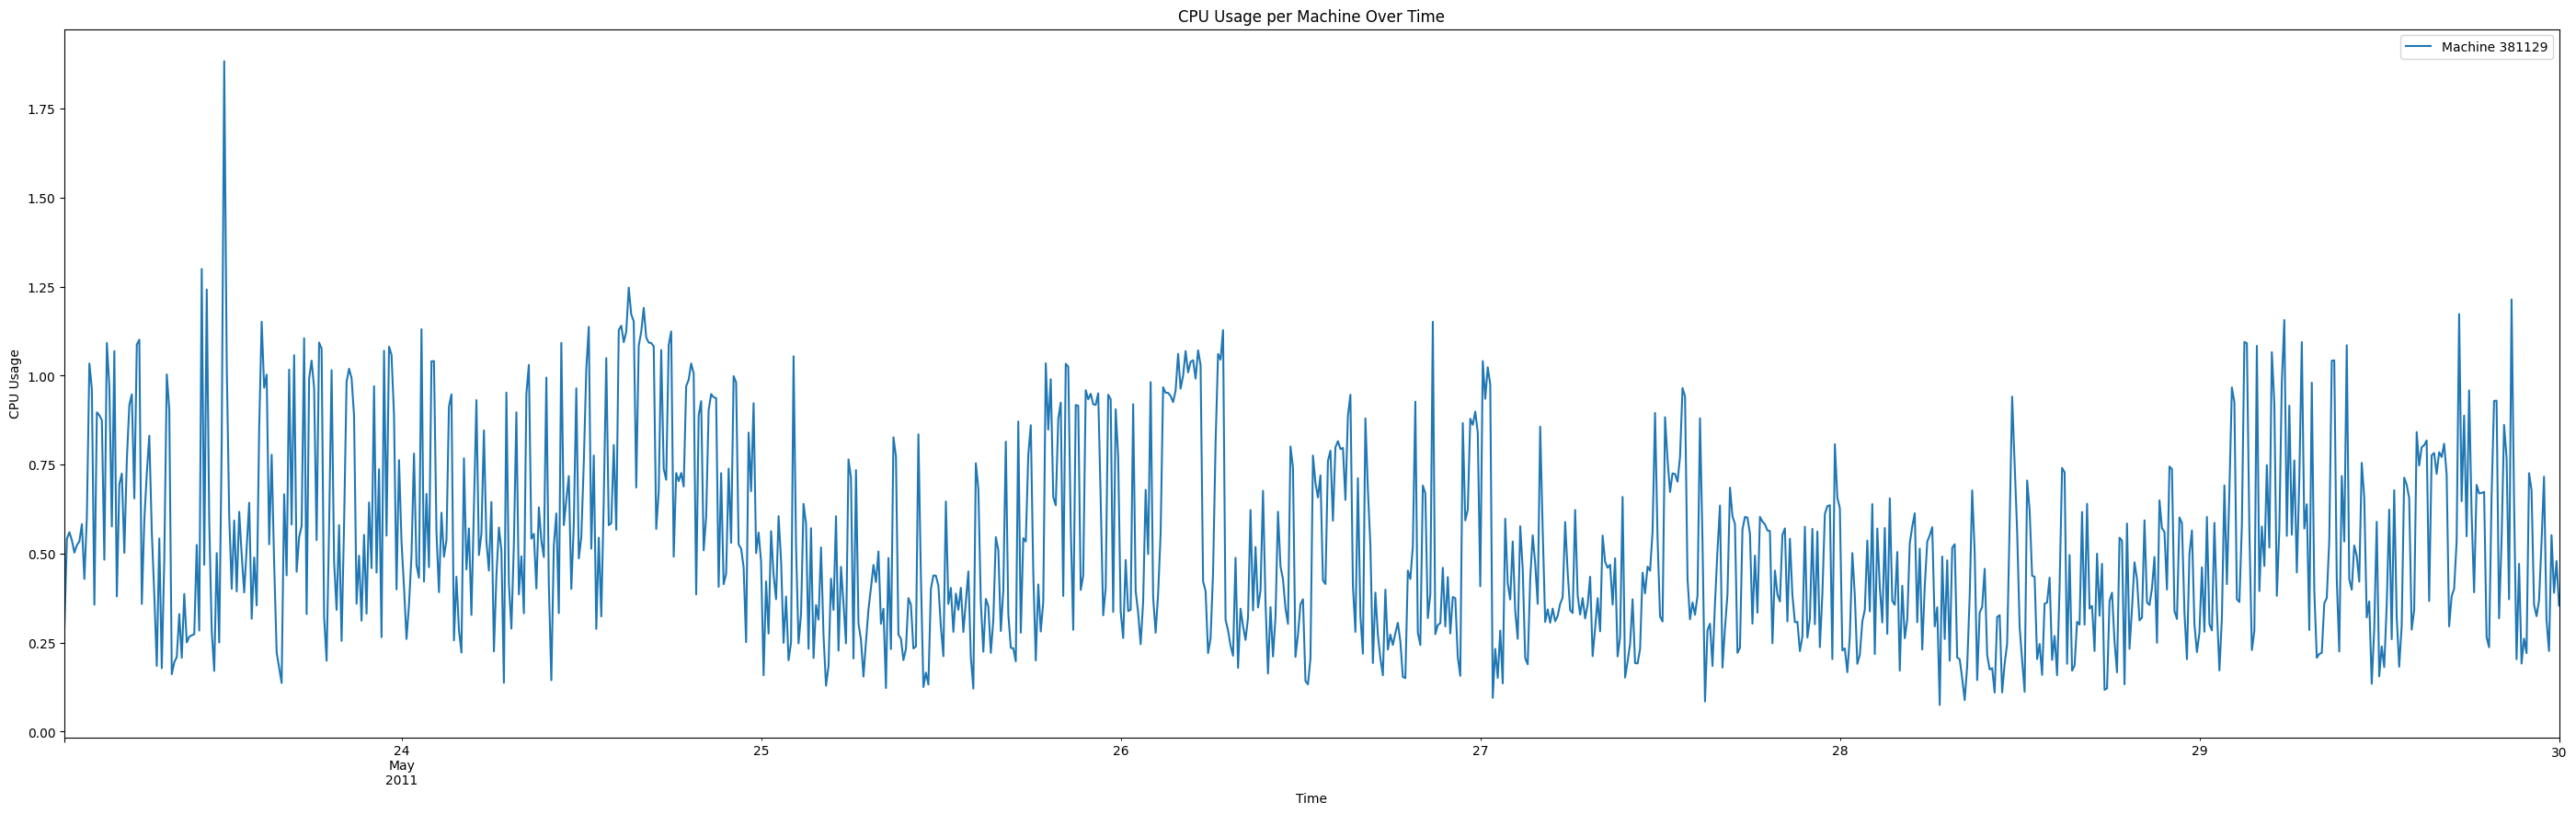

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
  
# Load the resampled_cpu_usage_per_machine.csv file  
df = pd.read_csv('resampled_cpu_usage_per_machine.csv')  
  
# Convert start_time from string to datetime  
df['start_time'] = pd.to_datetime(df['start_time'])  
  
# Set start_time as the DataFrame's index  
df.set_index('start_time', inplace=True)  
  
# Get the list of unique machines  
machines = df['machine_id'].unique()  
  
# Pick 5 machines (you can replace this with the IDs of the machines you want to plot)  
selected_machines = machines[:1]  

plt.figure(figsize=(35, 10)) 
target_machine_data = []
  
# Create a plot for each machine  
for machine in selected_machines:  
    df_machine = df[df['machine_id'] == machine].tail(1000)
    target_machine_data = df_machine
    df_machine['maximum_cpu_usage'].plot(label=f'Machine {machine}')  
  
# Add a legend and labels  
plt.legend()  
plt.xlabel('Time')  
plt.ylabel('CPU Usage')  
plt.title('CPU Usage per Machine Over Time')  
  
# Display the plot  
plt.show()  


In [2]:
print(target_machine_data)
max_cpu_usage_array = target_machine_data['maximum_cpu_usage'].values  

                     machine_id  maximum_cpu_usage
start_time                                        
2011-05-23 01:30:00      381129           0.292826
2011-05-23 01:40:00      381129           0.541687
2011-05-23 01:50:00      381129           0.560202
2011-05-23 02:00:00      381129           0.537236
2011-05-23 02:10:00      381129           0.502800
...                         ...                ...
2011-05-29 23:20:00      381129           0.226287
2011-05-29 23:30:00      381129           0.551809
2011-05-29 23:40:00      381129           0.390126
2011-05-29 23:50:00      381129           0.479176
2011-05-30 00:00:00      381129           0.354243

[1000 rows x 2 columns]


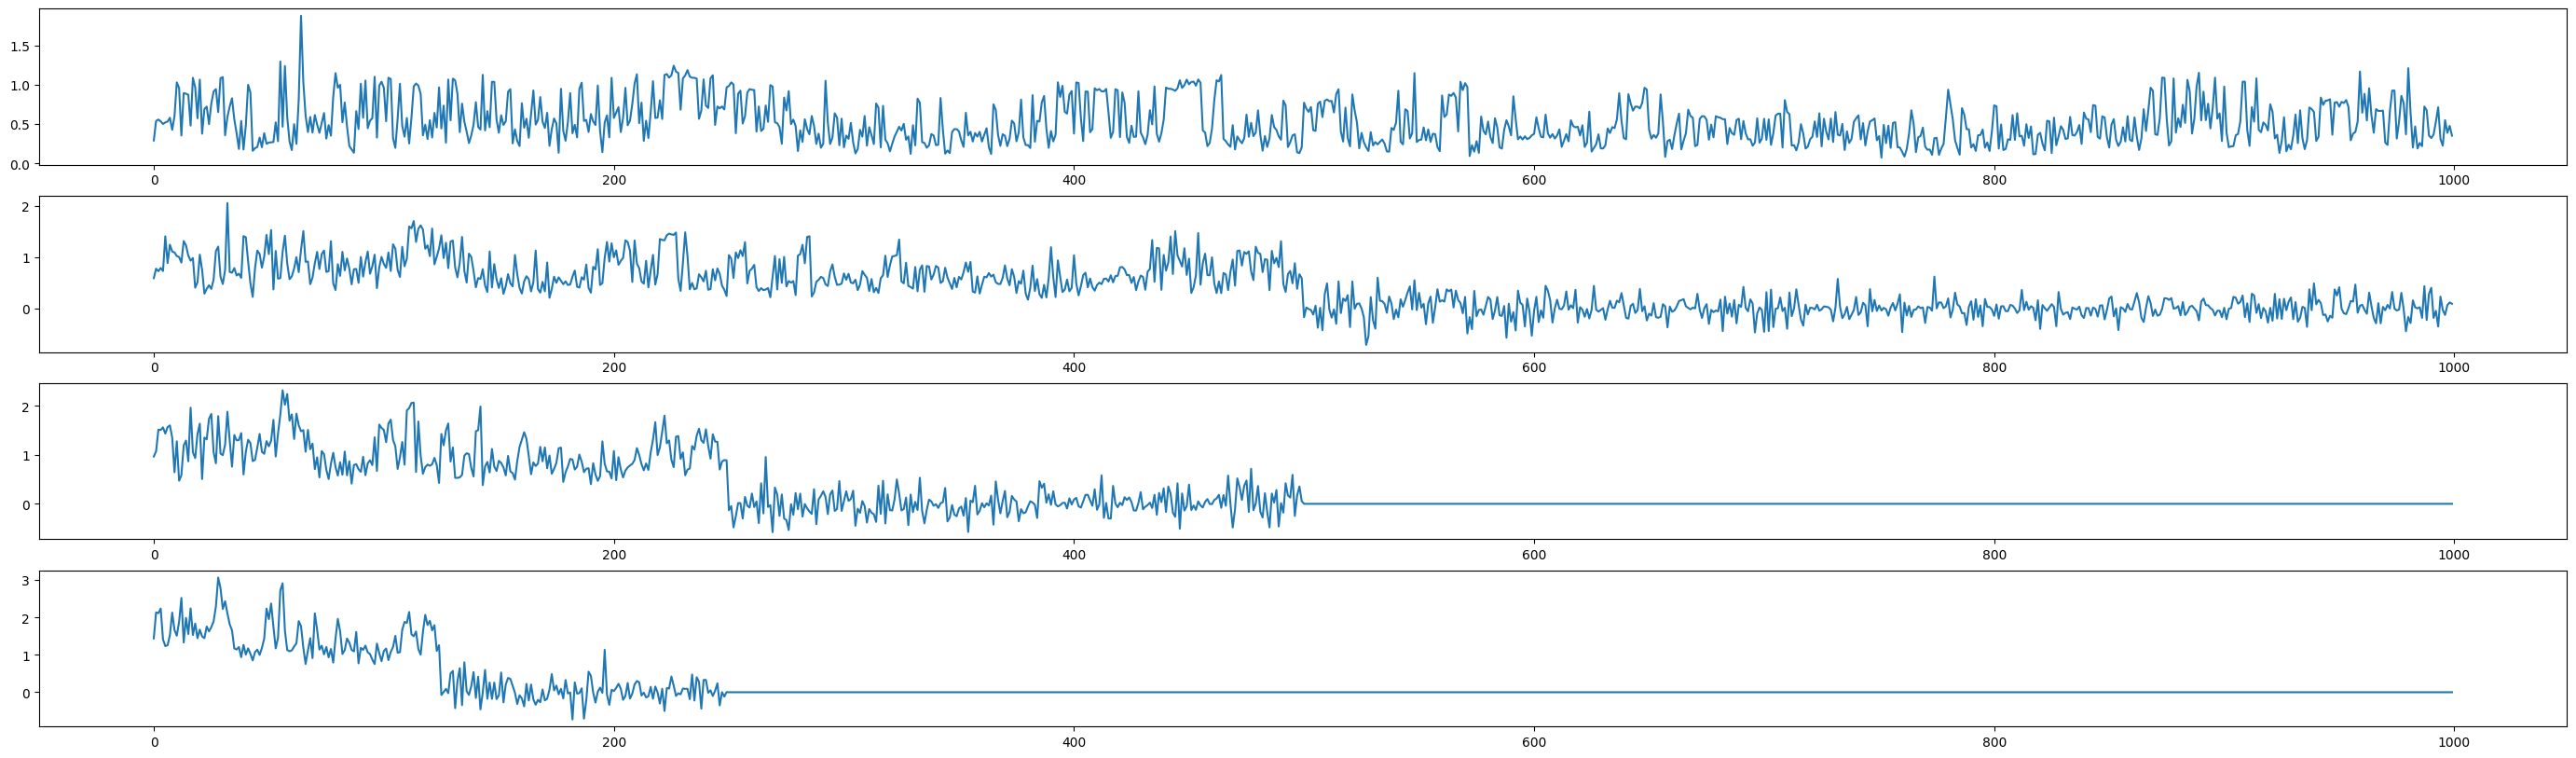

In [3]:
import pywt
import numpy as np
from matplotlib import pyplot as plt

def origin_s(t):
    return t

N = len(max_cpu_usage_array)
x = np.arange(0, len(max_cpu_usage_array))
y = max_cpu_usage_array

(A1, D1) = pywt.dwt(y, 'haar')
(A2, D2) = pywt.dwt(A1, 'haar')
(A3, D3) = pywt.dwt(A2, 'haar')

fig = plt.figure(figsize=(35, 10))

a1 = fig.add_subplot(411)
a1.plot(x, y)

a2 = fig.add_subplot(412)
a2.plot(x, np.concatenate((A1, D1)))

a3 = fig.add_subplot(413)
a3.plot(x, np.concatenate((A2, D2, np.zeros(int(N / 2)))))

a4 = fig.add_subplot(414)
a4.plot(x, np.concatenate((A3, D3, np.zeros(int(N * 3 / 4)))))

plt.show()


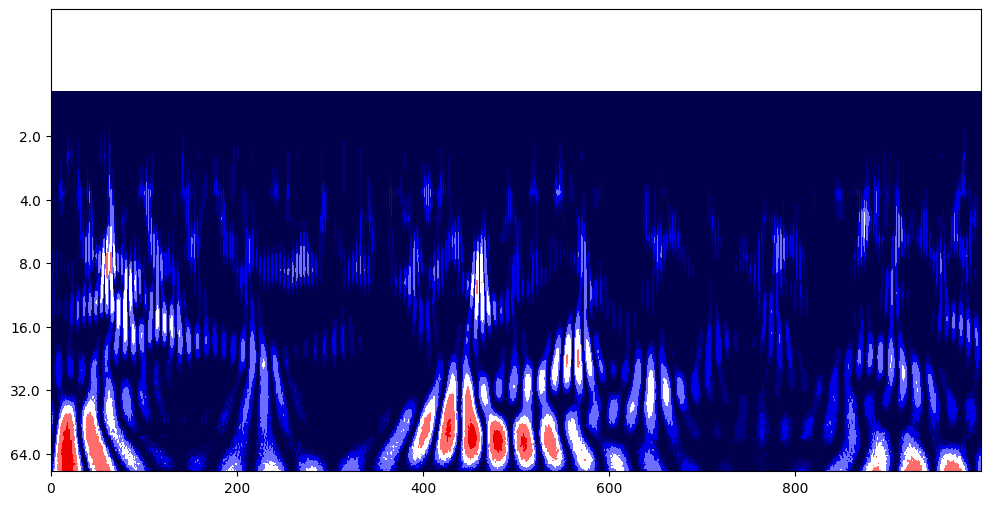

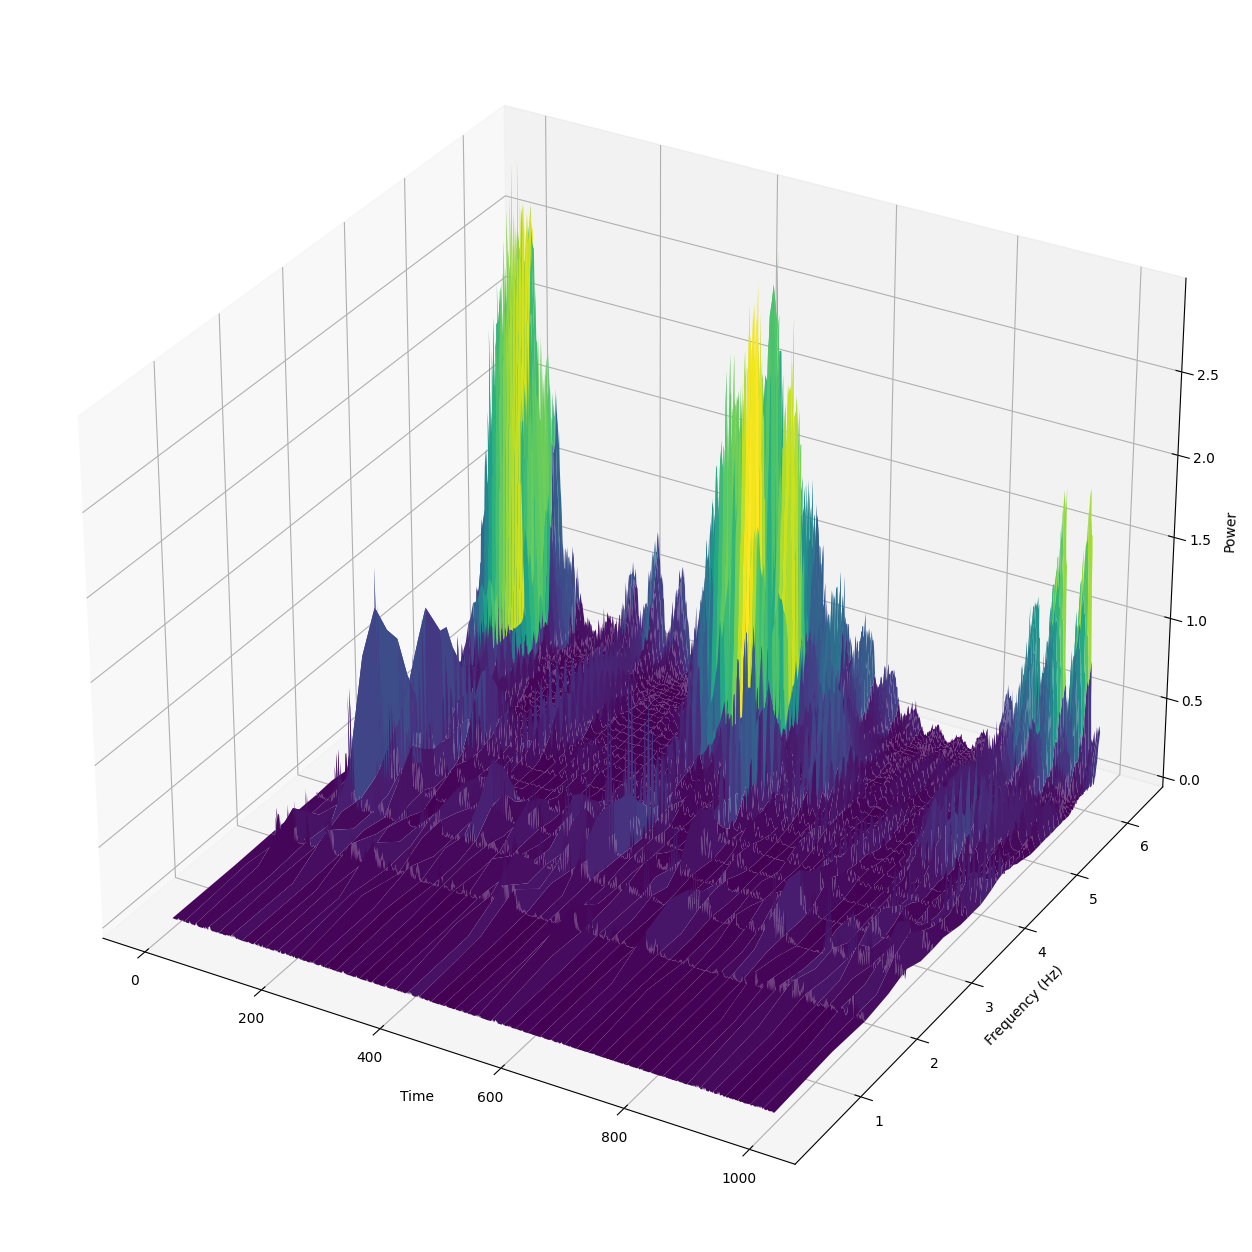

In [28]:
import numpy as np  
import matplotlib.pyplot as plt  
import pywt  
  
# Assume y is your signal  
  
scales = range(1, 64)  
waveletname = 'morl'  
dt = 1  # Sample spacing  
  
[coefficients, frequencies] = pywt.cwt(y, scales, waveletname, dt)  
power = (abs(coefficients)) ** 2  
# 计算每个频率下对应的周期
period = 1. / frequencies  
  
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]  
contourlevels = np.log2(levels)  
  
fig, ax = plt.subplots(figsize=(12, 6))  
# np.log2(period) 在信号处理中，周期（period）可能会有很大的变化范围，直接使用这些值可能会导致一些问题，例如图像显示不完整或者某些细节无法观察。而通过对数变换，我们可以更好地观察和理解这些周期的变化。
# np.log2(power) 原因是，当周期的变化范围很大（例如，从0.01秒到100秒）时，如果直接绘制等高线图，那么较大的值可能会使得较小的值在图中几乎看不出来。而通过对数变换，我们可以把原本线性增长的周期变为指数增长，这样就可以更好地显示出周期的所有变化范围。
im = ax.contourf(x, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=plt.cm.seismic)  
  
yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))  
ax.set_yticks(np.log2(yticks))  
ax.set_yticklabels(yticks)  
ax.invert_yaxis()  
ylim = ax.get_ylim()  
ax.set_ylim(ylim[0], -1)  
  
plt.show()  



from mpl_toolkits.mplot3d import Axes3D  
  
fig = plt.figure(figsize=(30, 16))  
ax = fig.add_subplot(111, projection='3d')  
  
time, freq = np.meshgrid(x, np.log2(period))  
  
ax.plot_surface(time, freq, power, cmap='viridis')  
ax.set_ylabel('Frequency (Hz)')  
ax.set_xlabel('Time')  
ax.set_zlabel('Power')  
  
plt.show()  


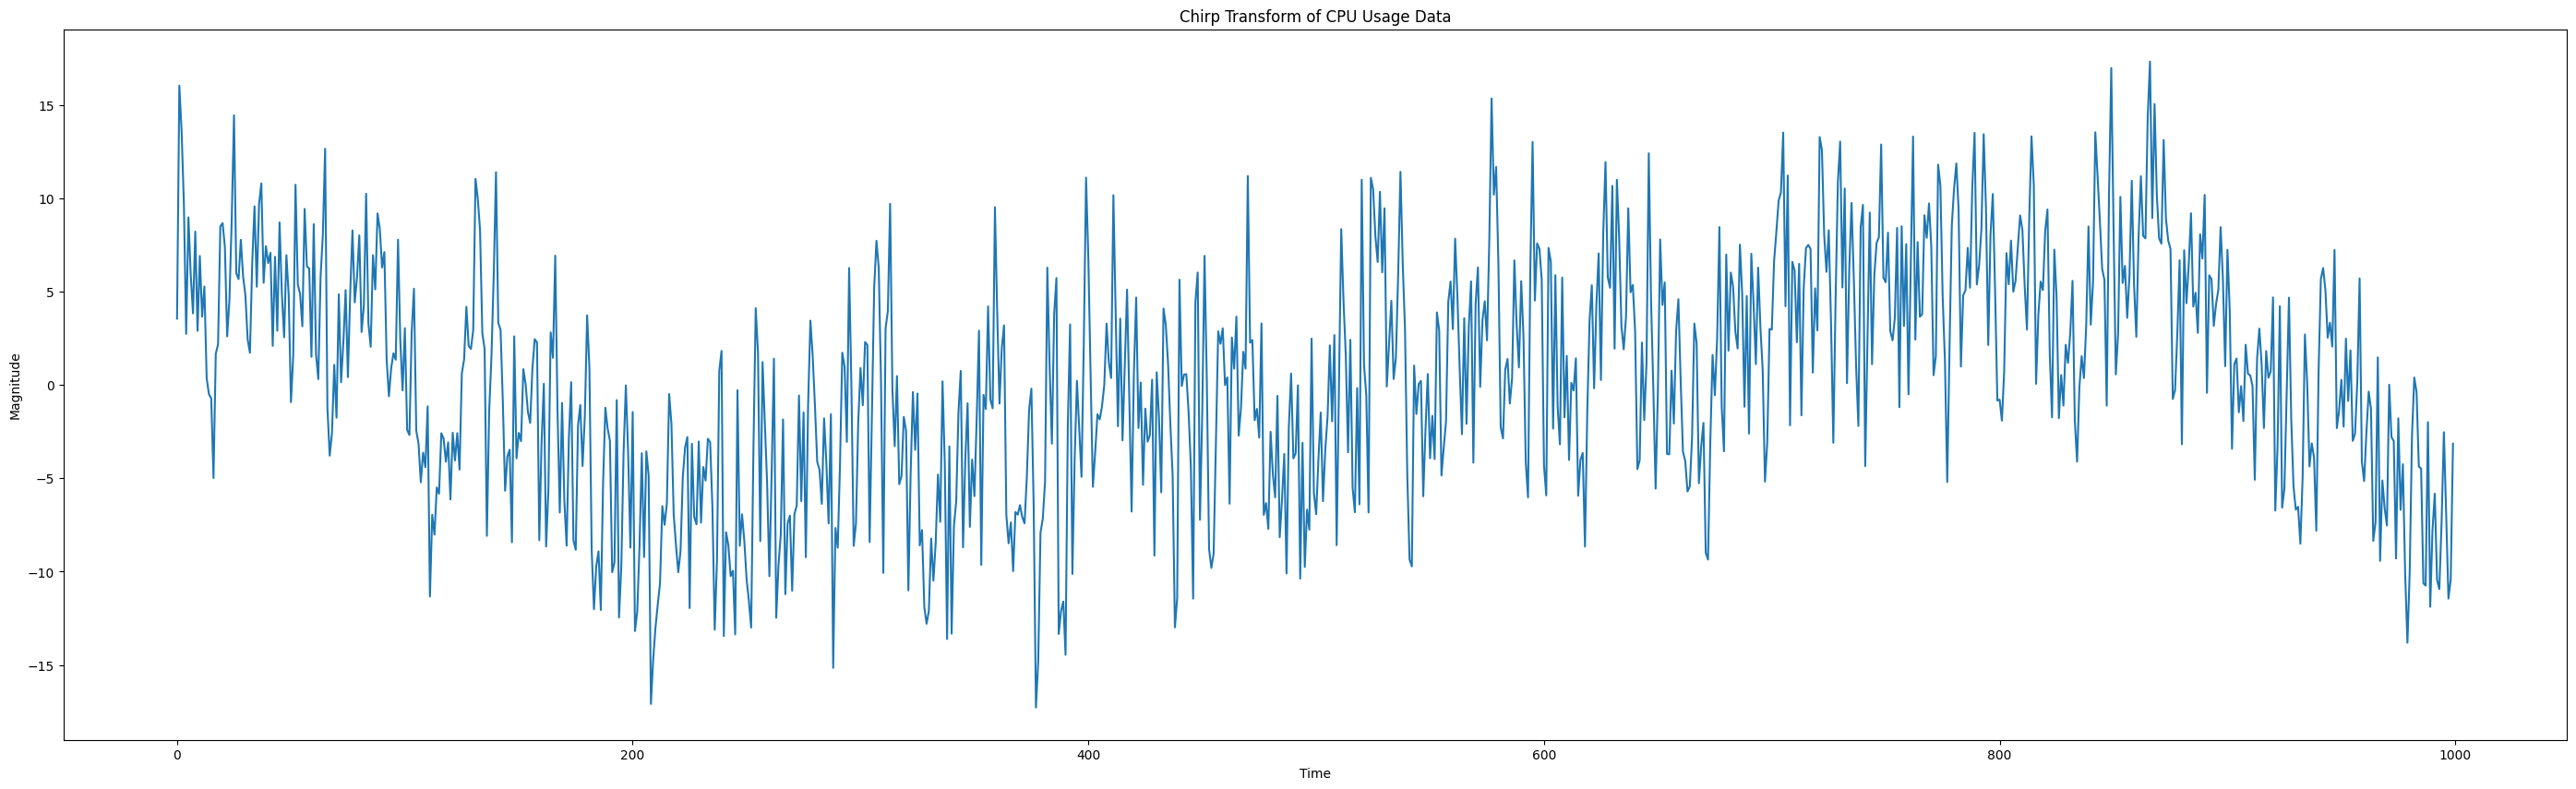

In [9]:
import numpy as np  
from scipy.signal import chirp, correlate  
  
# Your CPU usage data  
max_cpu_usage_array = target_machine_data['maximum_cpu_usage'].values   
  
# Time array  
t = np.linspace(0, len(max_cpu_usage_array), len(max_cpu_usage_array), endpoint=False)  
  
# Chirp signal  
w = chirp(t, f0=6, f1=1, t1=t[-1], method='linear')  
  
# Perform the Chirp Transform by correlating the chirp signal with your data  
chirp_transform = correlate(max_cpu_usage_array, w, mode='same')  
  
# Plot the Chirp Transform  
plt.figure(figsize=(35, 10)) 
plt.plot(t, chirp_transform)  
plt.title('Chirp Transform of CPU Usage Data')  
plt.xlabel('Time')  
plt.ylabel('Magnitude')  
plt.show()  


<Figure size 15000x10000 with 0 Axes>

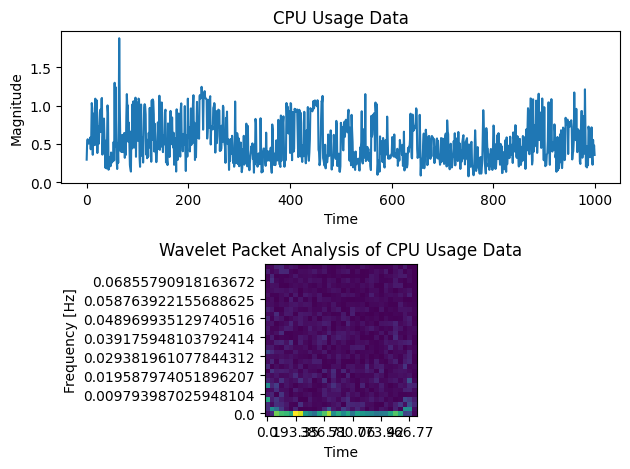

In [16]:
import torch  
from ptwt import WaveletPacket  
  
# Your CPU usage data  
max_cpu_usage_array = target_machine_data['maximum_cpu_usage'].values   

# Calculate time difference between data points  
time_diff = df.index.to_series().diff().dt.total_seconds().dropna()  
  
# Calculate the sampling frequency (fs)  
fs = 1/time_diff.mean() 
  
# Time array  
t = np.linspace(0, len(max_cpu_usage_array), len(max_cpu_usage_array), endpoint=False)  
  
# Perform the Wavelet Packet Analysis on your CPU usage data  
wavelet = pywt.Wavelet("sym8")  
wp = WaveletPacket(  
    data=torch.from_numpy(max_cpu_usage_array.astype(np.float32)), wavelet=wavelet, mode="boundary"  
)  
level = 5  
nodes = wp.get_level(level)  
np_lst = []  
for node in nodes:  
    np_lst.append(wp[node])  
viz = np.stack(np_lst).squeeze()  
  
n = list(range(int(np.power(2, level))))  
freqs = (fs / 2) * (n / (np.power(2, level)))  
  
xticks = list(range(viz.shape[-1]))[::6]  
xlabels = np.round(np.linspace(min(t), max(t), viz.shape[-1]), 2)[::6]  


# Set the size of the figure  
plt.figure(figsize=(150, 100))  
  
fig, axs = plt.subplots(2)  
axs[0].plot(t, max_cpu_usage_array)  
axs[0].set_title("CPU Usage Data")  
axs[0].set_xlabel("Time")  

axs[0].set_ylabel("Magnitude")  
  
axs[1].set_title("Wavelet Packet Analysis of CPU Usage Data")  
axs[1].imshow(np.abs(viz))  
axs[1].set_xlabel("Time")  
axs[1].set_xticks(xticks)  
axs[1].set_xticklabels(xlabels)  
axs[1].set_ylabel("Frequency [Hz]")  
axs[1].set_yticks(n[::4])  
axs[1].set_yticklabels(freqs[::4])  
axs[1].invert_yaxis()  
  
# Use tight_layout to prevent overlapping labels  
plt.tight_layout()  
plt.show() 
